In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *# Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda,Dropout
#from tensorflow.keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import concatenate
#from matplotlib import pyplot as plt
#import keras.backend as K

import numpy as np
import pickle
import os, cv2

#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

# %matplotlib inline
#root='/content/drive/My Drive/Car Data/'
#root=''
#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

C:\Users\irfan\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\irfan\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\irfan\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\irfan\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dty

In [2]:
from glob import glob
from matplotlib import pyplot as plt
#from tqdm import tqdm,trange
W=256
H=144
out_ch=3
def get_data(paths):
    _data=[]
    _label=[]
    road_id=np.array([128,64,128],dtype=np.float64)
    car_id=np.array([142,0,0],dtype=np.float64)
    for path in paths:
        print(path)
        for fname in glob(path+'/*'):
            img=cv2.imread(fname)
            img=np.array(img,dtype=np.float64)/255.0
            img=cv2.resize(img,(W,H))
            _data.append(img)
            
            label_fname='cs_data/label'+fname[12:]
            label_fname=label_fname[:-15]+'gtFine_color.png'
            
            label_img=cv2.imread(label_fname)
            label_img=cv2.resize(label_img,(W,H))
            label_img=np.array(label_img,dtype=np.float64)
            
            img=np.zeros((H,W,out_ch),dtype=np.float64)
            lower = road_id-5#np.array([245,0,190], dtype = "uint8")
            upper = road_id+5#np.array([255,20,210], dtype = "uint8")
            road=cv2.inRange(label_img,lower,upper)
            
            lower = car_id-5#np.array([245,0,190], dtype = "uint8")
            upper = car_id+5#np.array([255,20,210], dtype = "uint8")
            car=cv2.inRange(label_img,lower,upper)
            
            img[:,:,0]=road
            img[:,:,1]=car
            img[:,:,2]=np.array(~road + car,dtype=np.float64)#np.zeros_like(road)
            _label.append(img/255.0)
            
    return np.array(_data,dtype=np.float32),np.array(_label,dtype=np.float32)

In [3]:
###### import pickle
load_data=True
save_data=False

if save_data==True:
    train_paths=glob('cs_data/Data/train/*') #/aachen/
    val_paths=glob('cs_data/Data/val/*')
    test_paths=glob('cs_data/Data/test/*')

    train_data,train_label=get_data(train_paths[:])
    val_data,val_label=get_data(val_paths[:])
    test_data,test_label=get_data(test_paths[:])
    
    dts=[train_data,train_label,val_data,val_label,test_data,test_label]
    for i,dt in enumerate(dts):
        file=open('D:/cs_data_all/cs_data_'+str(i),'wb')
        pickle.dump(dt,file)
        file.close()

if load_data==True:
    dts=[0]*6
    for i,dt in enumerate(dts):
        file=open('D:/cs_data_all/cs_data_'+str(i),'rb')
        dts[i]=pickle.load(file)
        file.close()
    train_data,train_label,val_data,val_label,test_data,test_label=dts

In [4]:
#import sys
#sys.getsizeof([train_data])#,train_label,val_data,val_label,test_data,test_label])

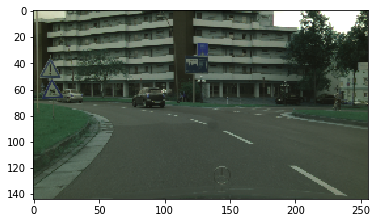

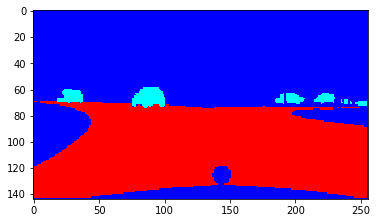

In [5]:
data=train_data[0]
label=train_label[0]
plt.imshow(data)
plt.show()
plt.imshow(label)
plt.show()

In [6]:
len(train_data), #sizeof(train_data
from ctypes import*
import sys
#sys.getsizeof(train_data),sys.getsizeof(val_data),sys.getsizeof(test_data)

In [7]:
from tensorflow.keras import backend as keras
#keras.tensorflow_backend._get_available_gpus()

In [8]:
import numpy as np 
import os
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
#from tensorflow.nn.layers import cov2d as Conv2D
from tensorflow.keras.optimizers import *
#from keras.callbacks import ModelCheckpoint, LearningRateScheduler
#from keras import backend as keras
#keras.tensorflow_backend._get_available_gpus()
N=64
def unet(pretrained_weights = None,input_size = (144,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(2*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(2*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(4*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(4*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(8*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(8*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(16*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(16*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(8*N, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(8*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(8*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(4*N, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(4*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(4*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(2*N, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(2*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(2*N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(N, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(N, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(3, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(out_ch, 1, activation = 'softmax')(conv9)
    

    model = Model(inputs, conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model
model=unet()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 144, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 144, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 144, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 72, 128, 64)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (

In [9]:
history=model.fit(train_data,train_label,batch_size=16,epochs=50,validation_data=(val_data,val_label))

Train on 2975 samples, validate on 500 samples
Epoch 1/50
2975/2975 [==============================] - 503s 169ms/step - loss: 11.1432 - acc: 0.6327 - val_loss: 9.6660 - val_acc: 0.6944
Epoch 2/50
2975/2975 [==============================] - 445s 150ms/step - loss: 9.0901 - acc: 0.7645 - val_loss: 8.9015 - val_acc: 0.7696
Epoch 3/50
2975/2975 [==============================] - 446s 150ms/step - loss: 8.6079 - acc: 0.7875 - val_loss: 8.5139 - val_acc: 0.7459
Epoch 4/50
2975/2975 [==============================] - 450s 151ms/step - loss: 8.1664 - acc: 0.8084 - val_loss: 8.1775 - val_acc: 0.8183
Epoch 5/50
2975/2975 [==============================] - 450s 151ms/step - loss: 7.8488 - acc: 0.8137 - val_loss: 7.7465 - val_acc: 0.8159
Epoch 6/50
2975/2975 [==============================] - 451s 151ms/step - loss: 7.5527 - acc: 0.8212 - val_loss: 7.3485 - val_acc: 0.7808
Epoch 7/50
2975/2975 [==============================] - 314s 106ms/step - loss: 7.2740 - acc: 0.8125 - val_loss: 7.1892 - va

In [9]:
import tensorflow as tf
tf.__version__

'1.12.0'

<Figure size 720x720 with 0 Axes>

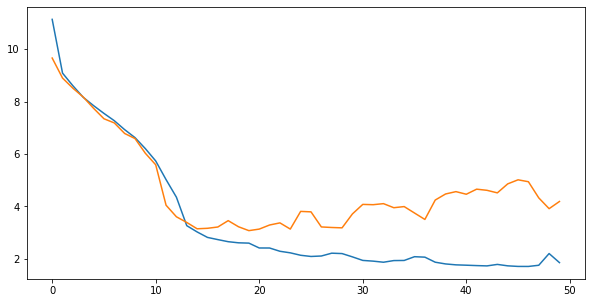

In [20]:
from matplotlib import pyplot as plt
#=plt.figure(10,10)
fig=plt.figure(figsize=(10,5))
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.show()
fig.savefig('loss_curve_50_.png')

In [ ]:
i=120
#model.load_weights('unet_wts_cs_20.h5')
pred_imgs3=[]
for i in range(0,250):
     
    pred_img=np.zeros((W,H,3),dtype=np.float64)
    pred_img[:,:,:out_ch]=pred.copy()
    pred_imgs3.append(pred_img)
    #plt.imshow(ret)
pred_imgs4=[]
for i in range(0,250):
    pred=model.predict(_test_data4[i:i+1])
    pred_img=np.zeros((W,H,3),dtype=np.float64)
    pred_img[:,:,:out_ch]=pred.copy()
    pred_imgs4.append(pred_img)

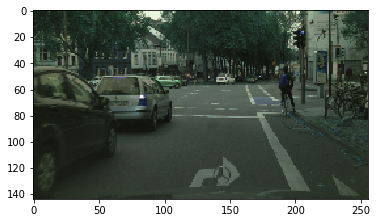

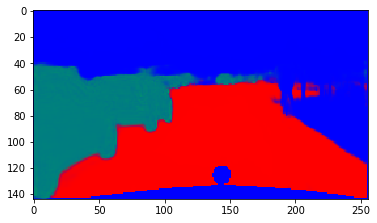

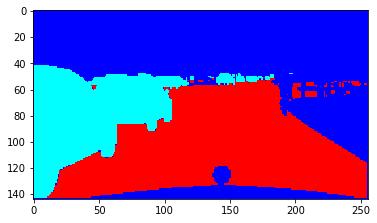

In [23]:
from matplotlib import pyplot as plt
res=np.zeros((W,H,3),dtype=np.float64)
res1=np.zeros((W,H,3),dtype=np.float64)
pred=model.predict(train_data[i:i+1])
#res1[:,:,:out_ch]=ohe_test_label[i].copy()
i=10
plt.imshow(train_data[i])
plt.show()
plt.imshow(pred[0,:,:,:])
plt.show()
#plt.imshow(res1)
#plt.show()
plt.imshow(train_label[i])
plt.show()

In [11]:
model.save('unet_wts_cs-50.h5')

In [15]:
import pickle
f=open('AS3s_CT_123/dataset_iLQR','rb')
dataset3=pickle.load(f)
f.close()
import pickle
f=open('AS4s_CT_123/dataset_iLQR','rb')
dataset4=pickle.load(f)
f.close()

In [16]:
dataset3.keys()

dict_keys(['state', 'traj', 'image', 'action', 'next_sate', 'time_reward'])

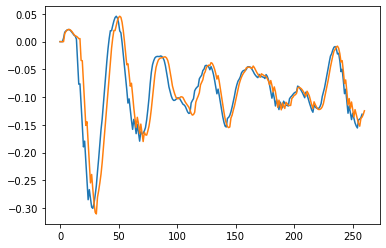

In [17]:
steer3=np.array(dataset3['action'],dtype=np.float64)[:,1]
steer4=np.array(dataset4['action'],dtype=np.float64)[:,1]
plt.plot(steer3)
plt.plot(steer4)
plt.show()

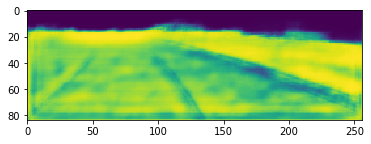

In [47]:
plt.imshow(pred_imgs3[0][60:,:,0])
cxy3=[]
cxy4=[]
for i in range(250):
    M=cv2.moments(pred_imgs3[i][60:,:,0])
    cx,cy=int(M['m01']/M['m00']),int(M['m10']/M['m00'])
    cxy3.append([cx,cy])
cxy3=np.array(cxy3,dtype=np.int)
for i in range(250):
    M=cv2.moments(pred_imgs4[i][60:,:,0])
    cx,cy=int(M['m01']/M['m00']),int(M['m10']/M['m00'])
    cxy4.append([cx,cy])
cxy4=np.array(cxy4,dtype=np.int)
oxy3=[]
oxy4=[]
for i in range(250):
    M=cv2.moments(pred_imgs3[i][60:,:,1])
    cx,cy=int(M['m01']/M['m00']),int(M['m10']/M['m00'])
    oxy3.append([cx,cy])
oxy3=np.array(oxy3,dtype=np.int)
for i in range(250):
    M=cv2.moments(pred_imgs4[i][60:,:,1])
    cx,cy=int(M['m01']/M['m00']),int(M['m10']/M['m00'])
    oxy4.append([cx,cy])
oxy4=np.array(oxy4,dtype=np.int)

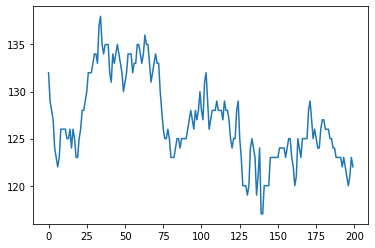

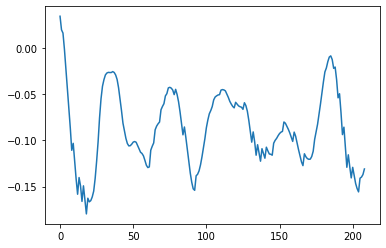

In [48]:
_cxy3=(cxy3[50:,1]-75)*0.01
plt.plot(cxy3[50:,1])
#plt.plot(cxy4[:,1]-125)
plt.show()
#plt.plot(oxy3[:,1])
#plt.plot(oxy4[:,1])
#plt.show()
plt.plot(steer3[50:])
#plt.plot(steer4)
plt.show()

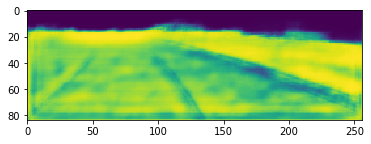

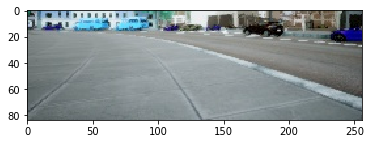

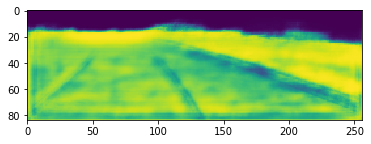

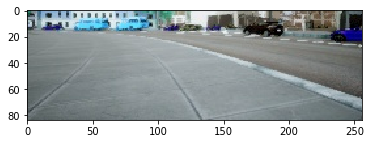

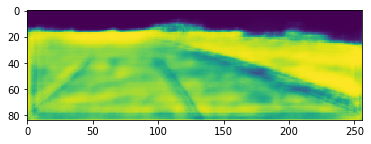

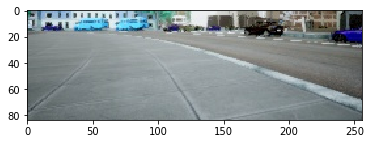

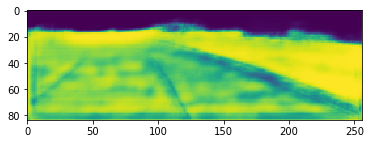

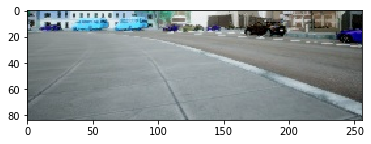

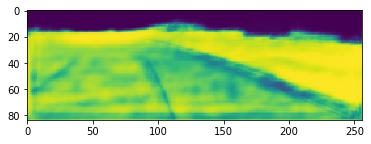

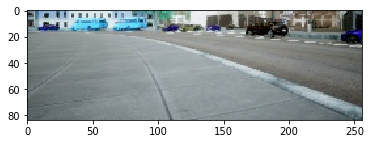

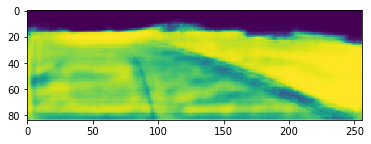

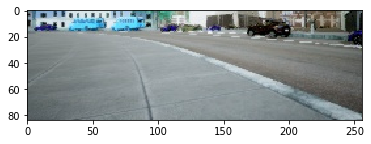

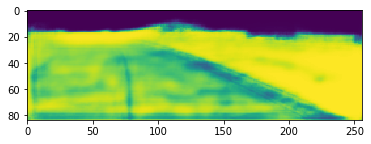

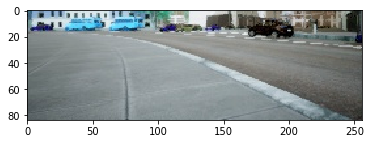

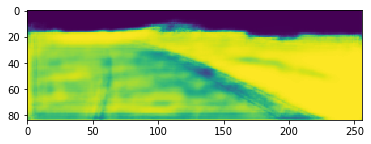

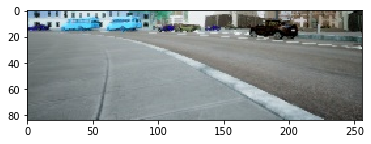

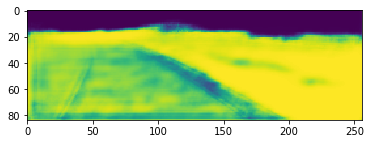

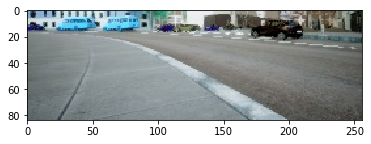

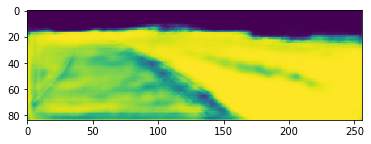

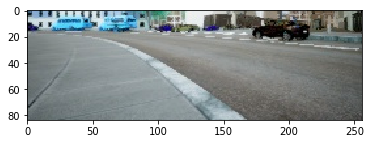

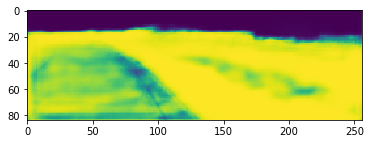

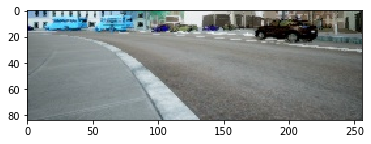

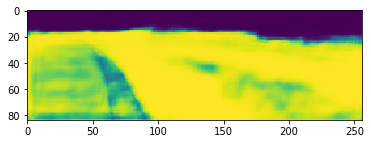

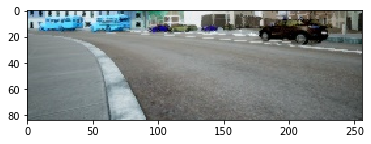

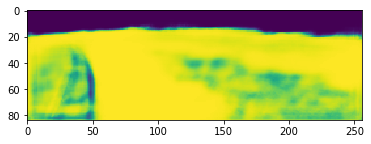

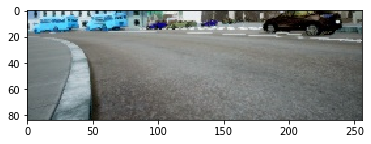

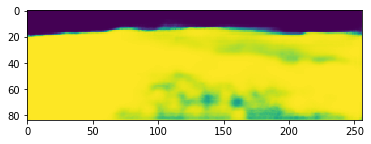

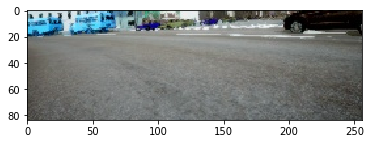

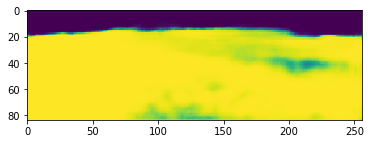

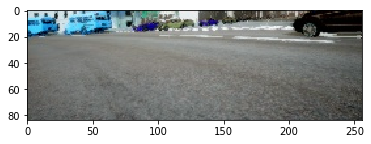

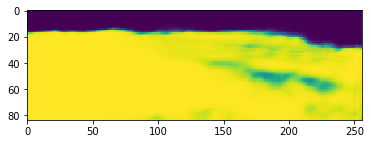

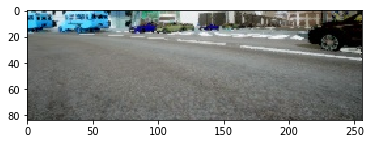

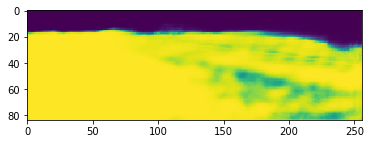

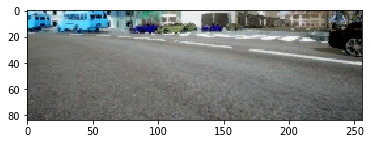

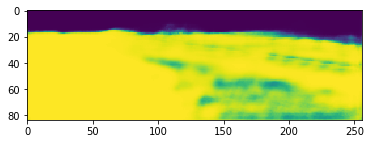

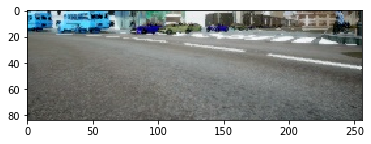

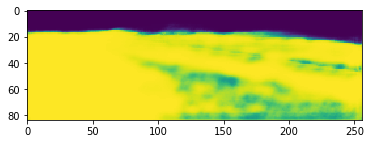

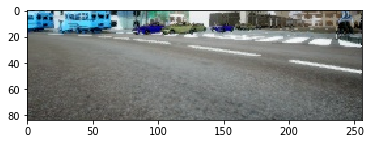

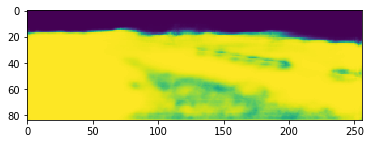

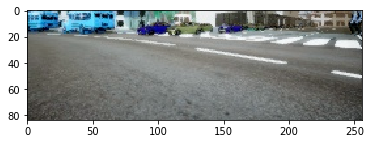

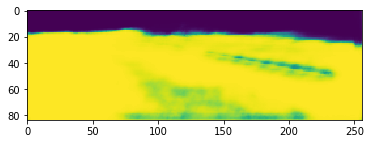

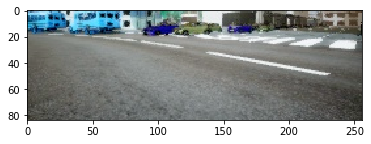

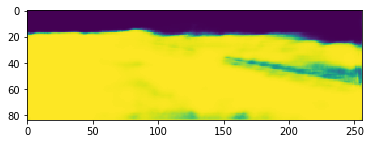

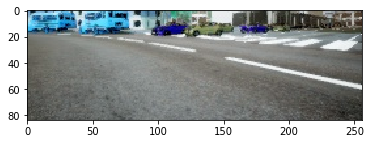

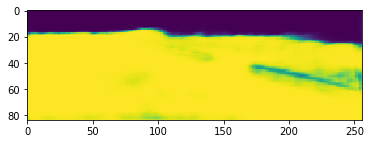

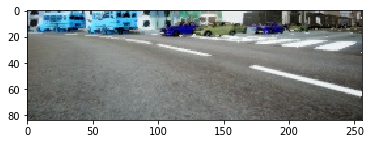

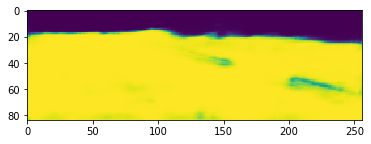

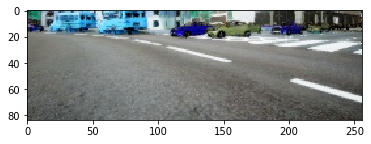

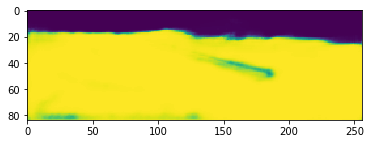

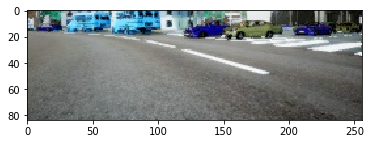

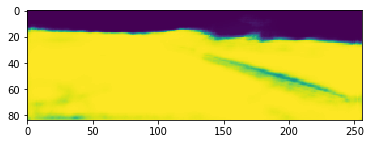

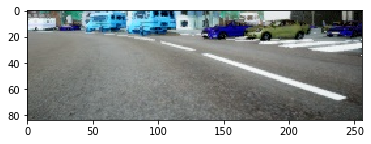

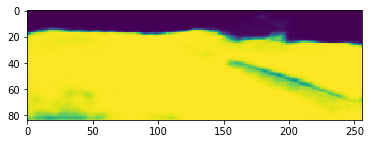

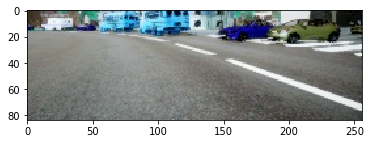

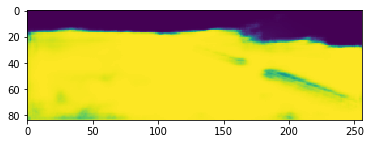

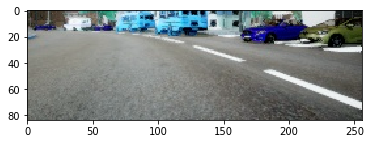

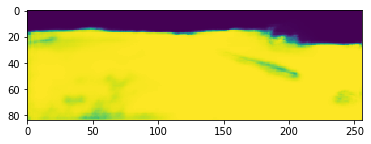

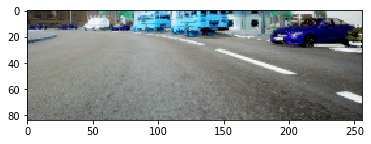

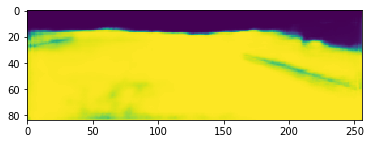

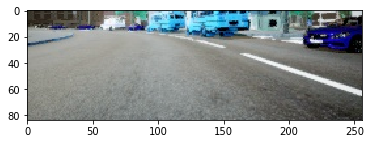

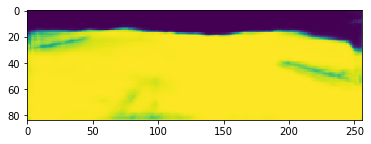

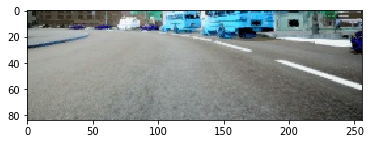

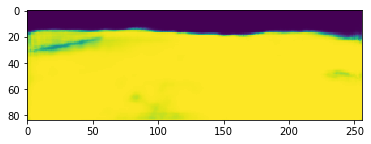

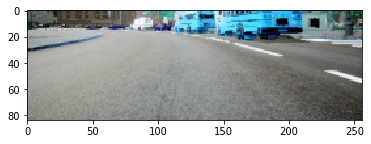

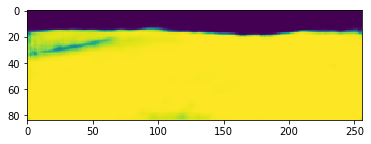

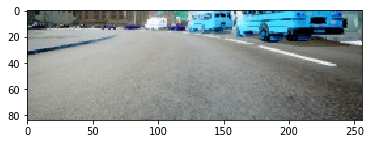

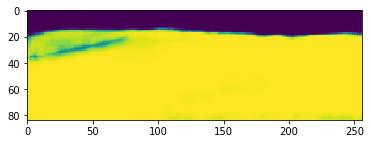

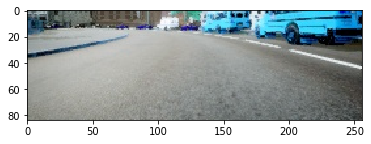

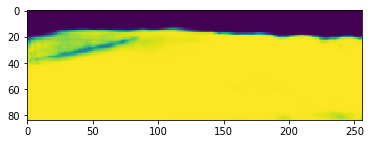

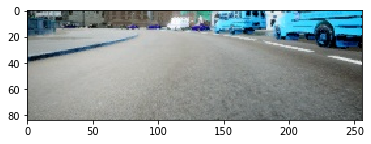

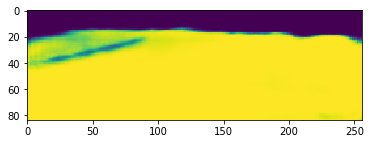

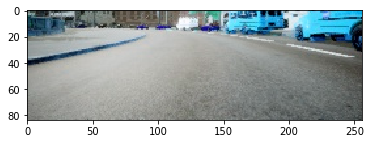

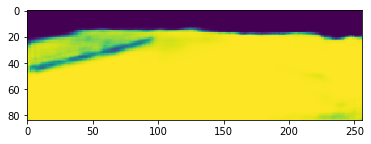

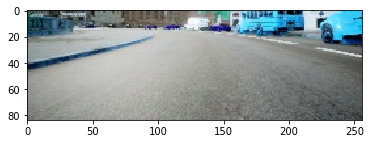

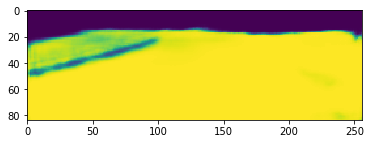

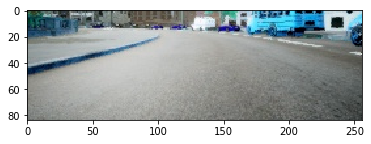

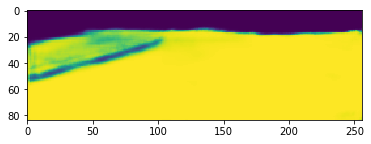

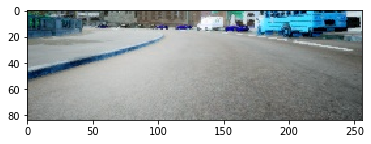

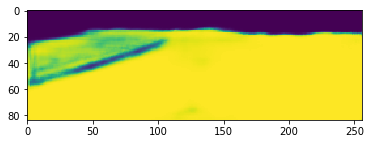

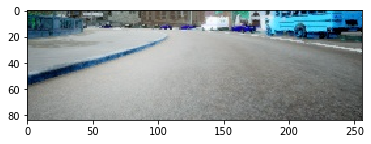

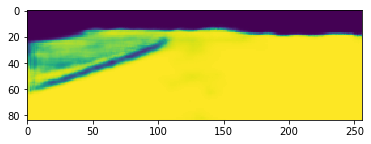

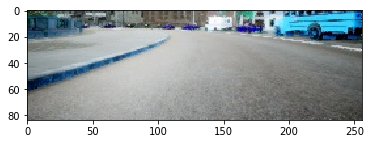

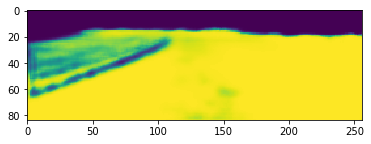

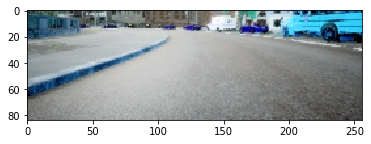

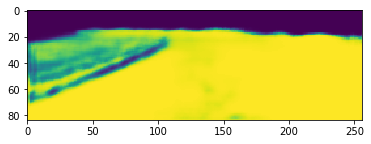

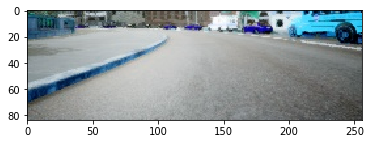

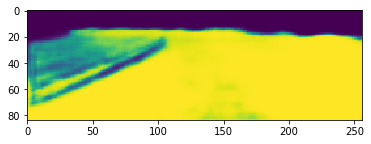

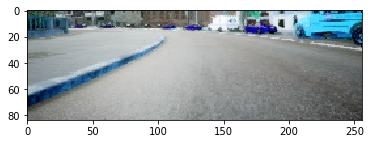

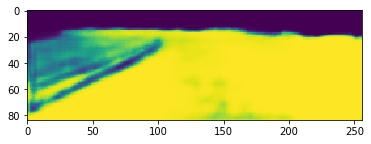

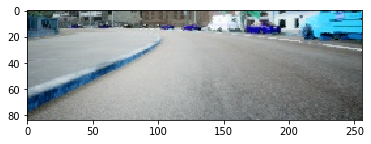

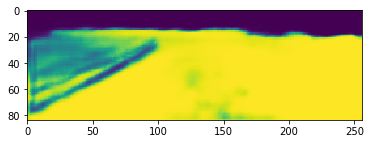

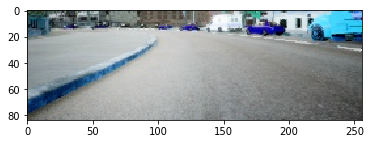

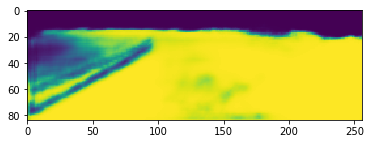

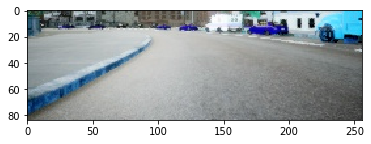

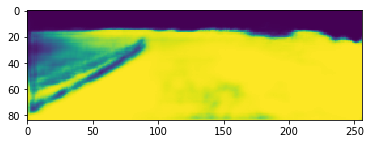

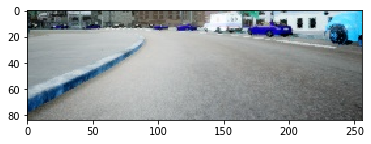

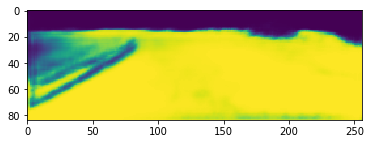

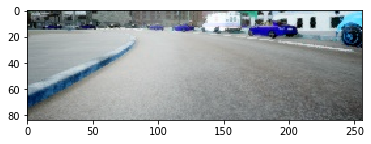

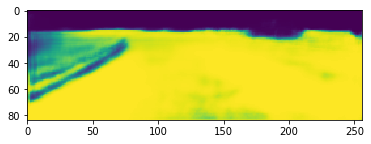

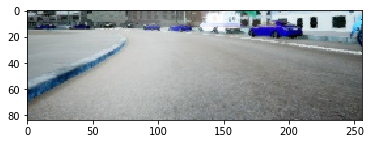

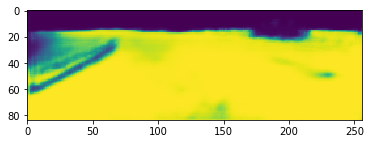

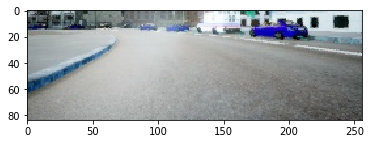

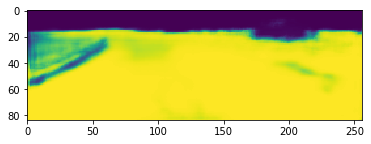

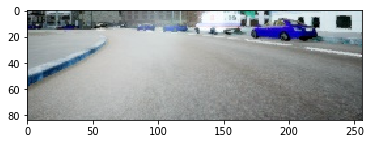

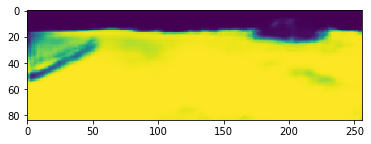

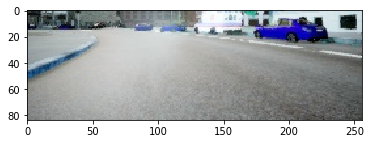

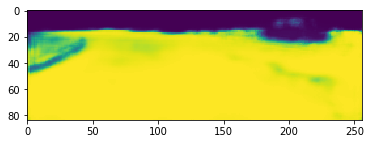

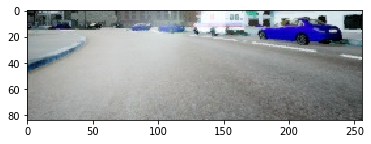

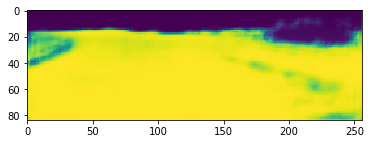

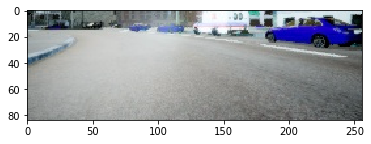

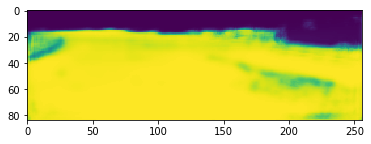

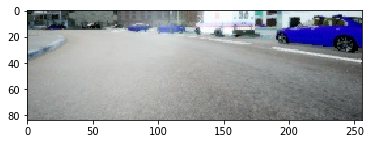

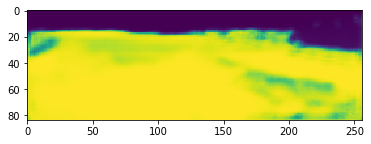

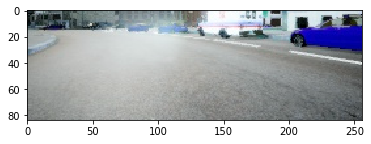

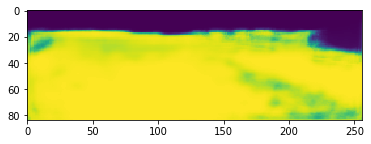

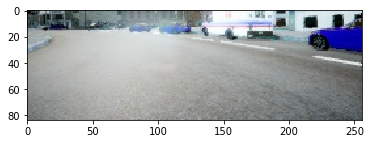

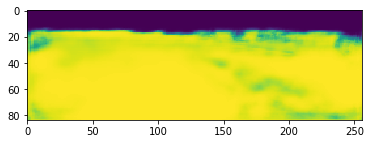

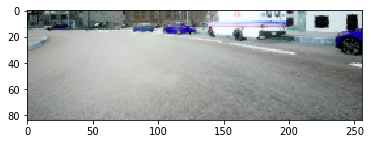

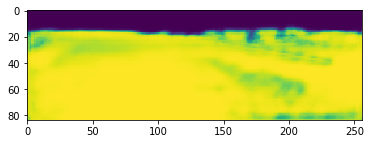

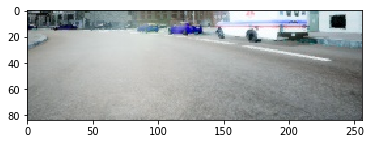

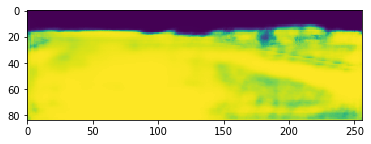

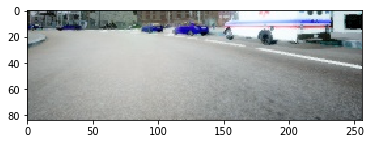

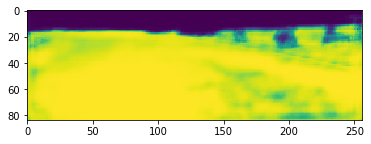

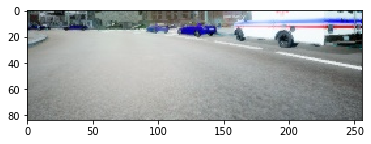

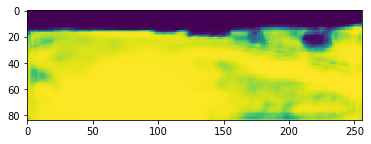

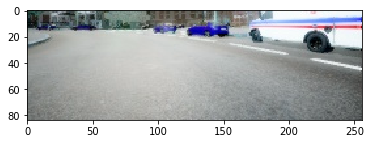

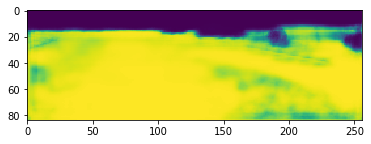

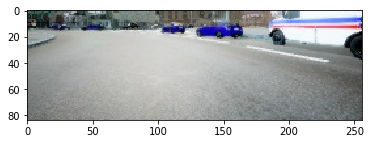

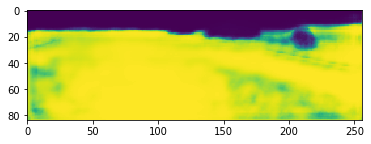

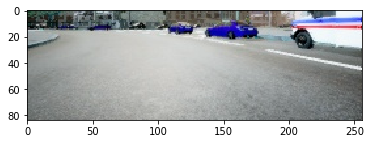

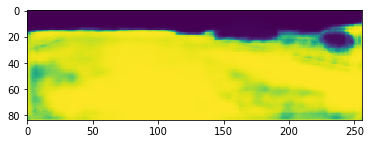

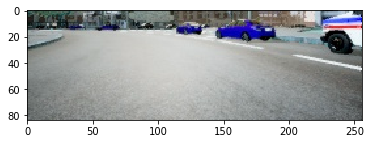

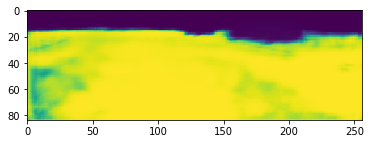

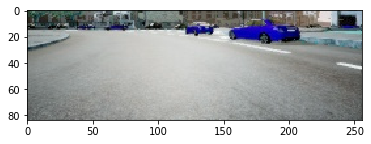

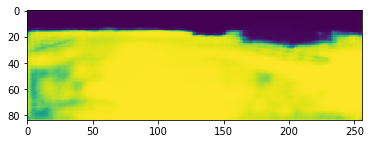

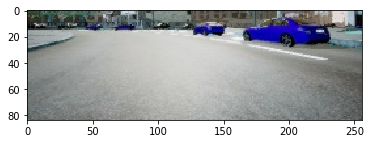

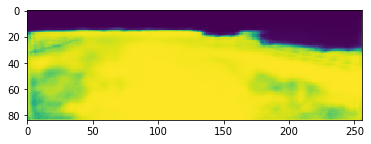

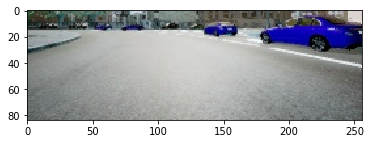

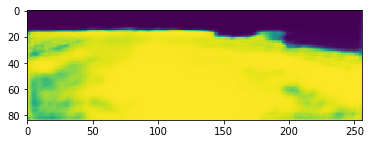

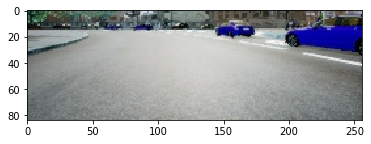

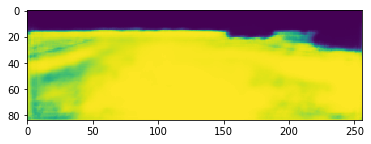

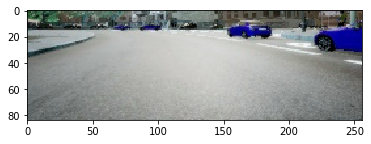

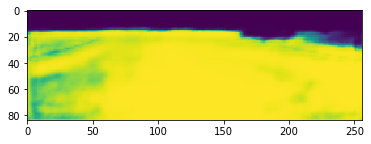

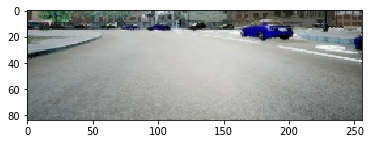

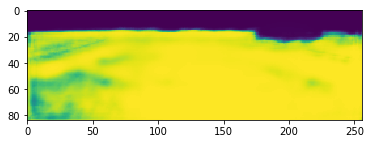

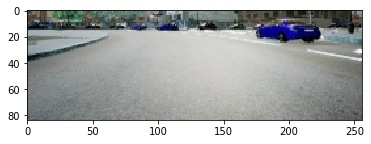

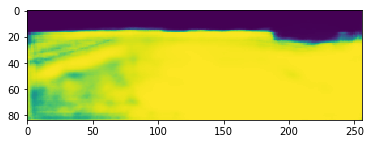

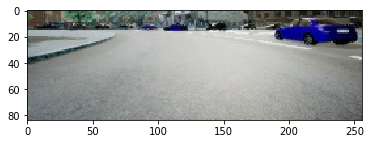

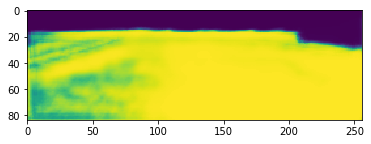

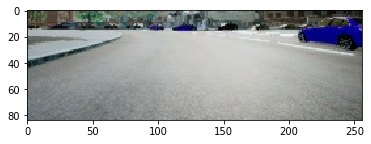

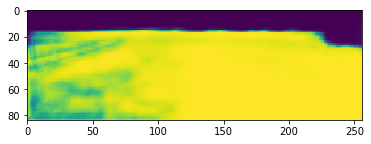

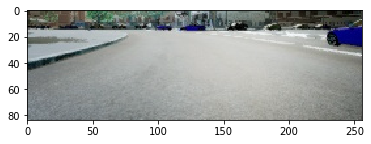

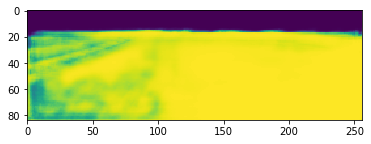

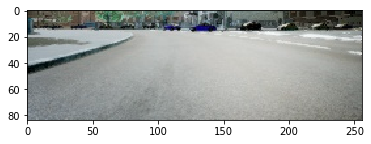

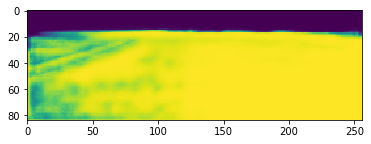

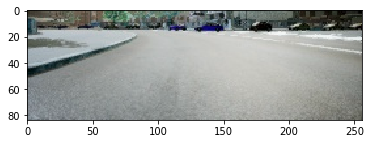

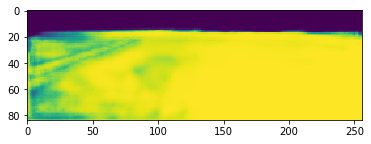

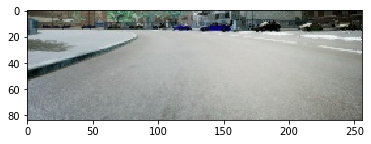

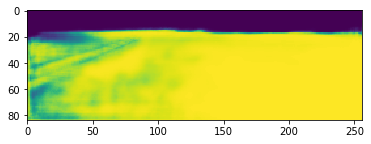

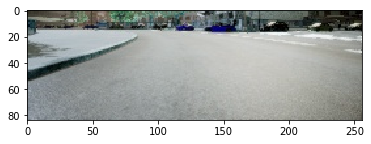

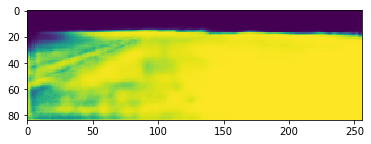

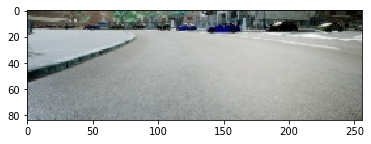

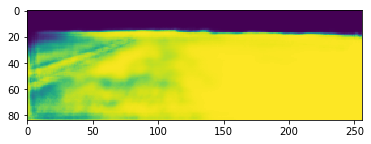

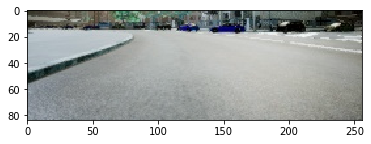

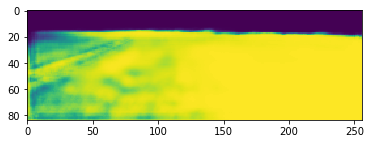

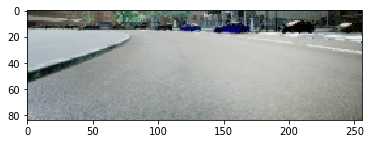

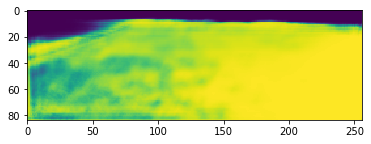

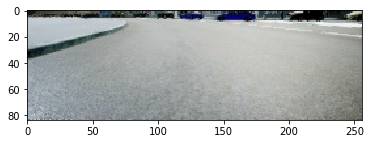

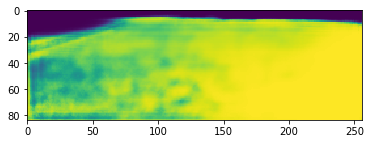

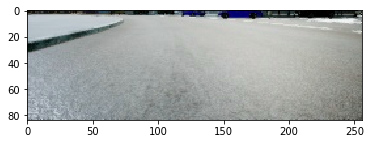

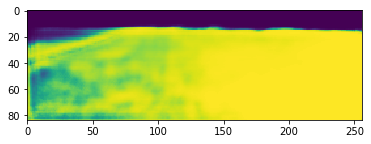

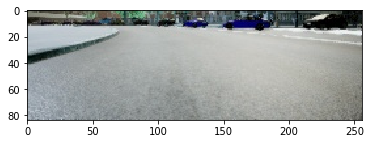

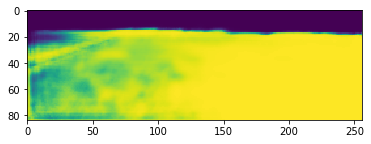

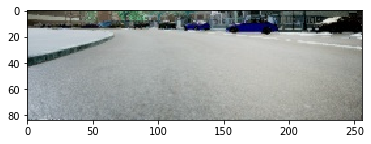

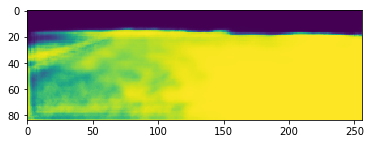

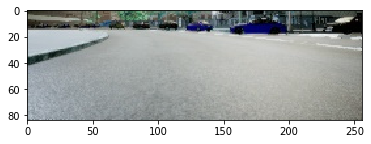

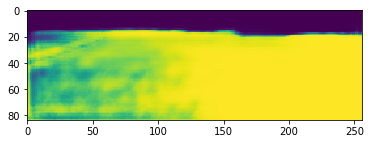

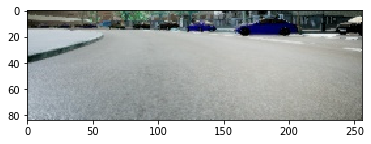

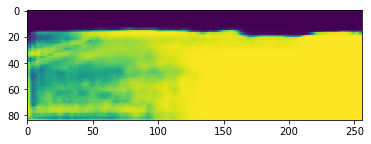

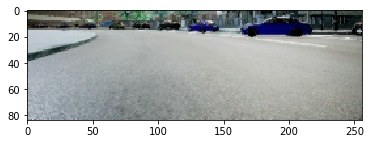

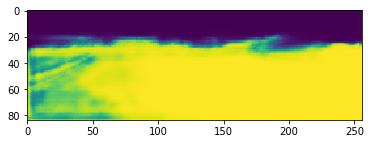

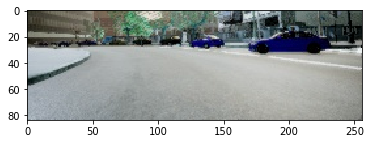

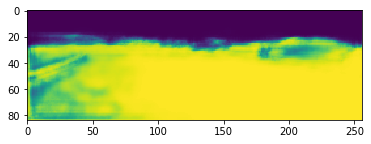

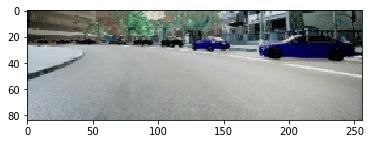

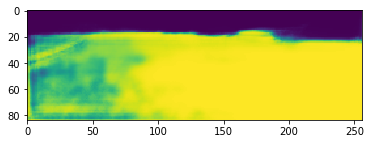

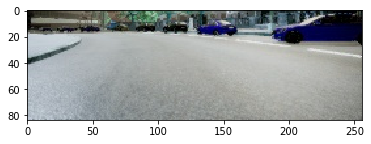

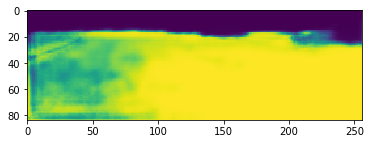

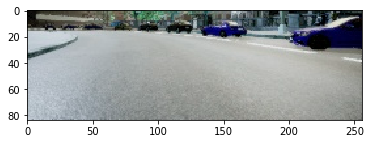

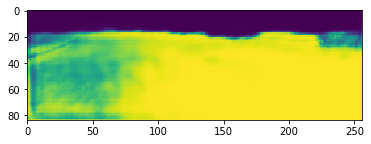

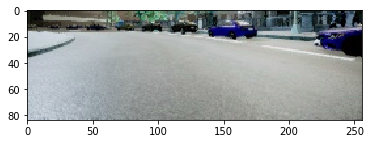

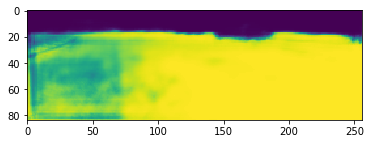

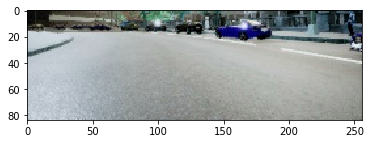

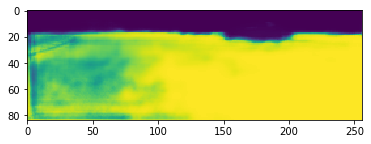

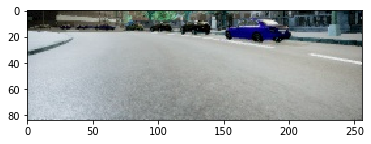

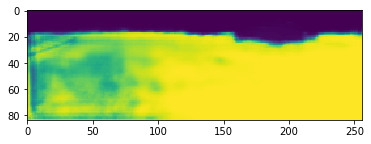

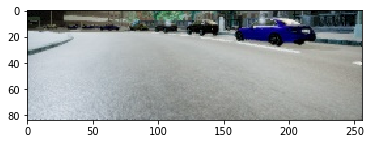

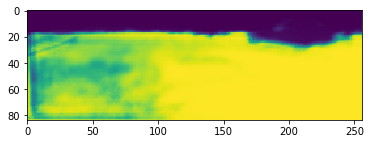

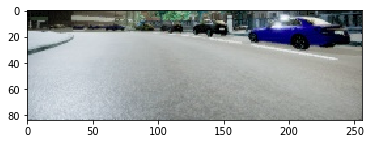

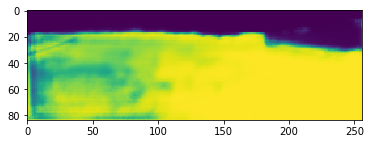

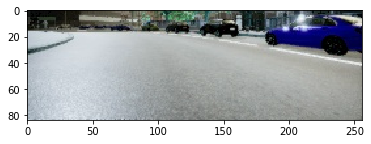

In [57]:

for i in range(100):
     plt.imshow(pred_imgs3[i][60:,:,0])#*_test_data3[i][60:,:,0])
     plt.show()
     plt.imshow(_test_data3[i][60:,:,:])
     plt.show()